In [1]:
!pip install tifffile
!pip install opencv-python
!pip install rasterio
!pip install scipy==1.7.3
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.7.3-cp310-cp310-win_amd64.whl (34.3 MB)
  Using cached numpy-1.22.4-cp310-cp310-win_amd64.whl (14.7 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


Defaulting to user installation because normal site-packages is not writeable


Since images were stored in tar.gz files, their compression algorithm was changed to adobe_deflate instead of LZW. Adobe_deflate does not work in pytorch tensors. To remedy:

1. install imageMagick
2. open command line and navigate to the directory where imageMagick was installed
3. make sure to backup the train and test folders elsewhere
3. enter: magick mogrify -compress LZW "C:\Users\Axl Wynants\Automate-Image-Annotation-for-Decision-Support-Systems\train\image\*.tiff" (change file path as needed)
4. .tiff images in the train/image folder are now changed to LZW compression and we can proceed

In [1]:
import numpy as np
import pandas as pd
import os
import tifffile
import torch 
import imageio
import cv2
import matplotlib.pyplot as plt
from skimage import io,img_as_float
from torchvision.transforms import ToTensor
import rasterio
from rasterio.plot import show
from PIL import Image
from torchvision.transforms import ToTensor

# Open TIFF image using PIL
image = Image.open("train/image/CTR_20200408_00R-Scene-020-ScanRegion19_S0M3_AF_FITC.tiff")
workingimage = Image.open("C:/Users/Axl Wynants/Desktop/Statistics/2Ma/Thesis/Images/Milan_Raw/Milan_raw/01_raw/AIH_scene01_02R_Cy5_CD68.tif")
convertedimage = Image.open("train/image_lzw.tiff")


# Now you can use ToTensor
from torchvision.transforms import ToTensor
tensor_image = ToTensor()(image)
#cv2 is better actually

C:\Users\Axl Wynants\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cv2test = cv2.imread("train/image/CTR_20200408_00R-Scene-020-ScanRegion19_S0M3_AF_FITC.tiff", cv2.IMREAD_GRAYSCALE)

In [3]:
cv2testt = ToTensor()(cv2test)

In [4]:
cv2testt

tensor([[[0.0078, 0.0078, 0.0078,  ..., 0.0314, 0.0431, 0.0549],
         [0.0078, 0.0118, 0.0078,  ..., 0.0353, 0.0471, 0.0588],
         [0.0078, 0.0078, 0.0078,  ..., 0.0275, 0.0314, 0.0392],
         ...,
         [0.0118, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157]]])

In [5]:
tensor_image

tensor([[[ 704,  670,  664,  ..., 2263, 2894, 3601],
         [ 723,  796,  694,  ..., 2437, 3240, 3859],
         [ 636,  715,  714,  ..., 1911, 2259, 2612],
         ...,
         [ 811,  731,  729,  ..., 1057, 1147, 1106],
         [ 666,  760,  671,  ..., 1182, 1036, 1142],
         [ 762,  711,  765,  ..., 1117, 1105, 1113]]], dtype=torch.int16)

In [6]:
normalized_tensor_pil = tensor_image.float() / torch.iinfo(torch.int16).max
print(normalized_tensor_pil)

tensor([[[0.0215, 0.0204, 0.0203,  ..., 0.0691, 0.0883, 0.1099],
         [0.0221, 0.0243, 0.0212,  ..., 0.0744, 0.0989, 0.1178],
         [0.0194, 0.0218, 0.0218,  ..., 0.0583, 0.0689, 0.0797],
         ...,
         [0.0248, 0.0223, 0.0222,  ..., 0.0323, 0.0350, 0.0338],
         [0.0203, 0.0232, 0.0205,  ..., 0.0361, 0.0316, 0.0349],
         [0.0233, 0.0217, 0.0233,  ..., 0.0341, 0.0337, 0.0340]]])


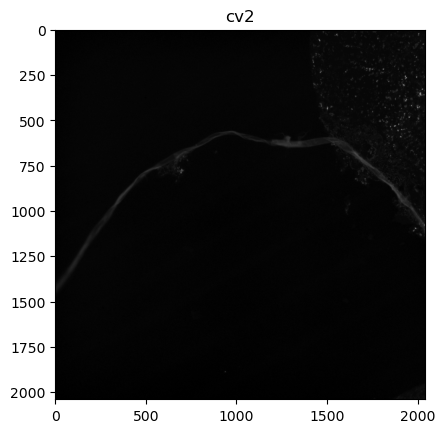

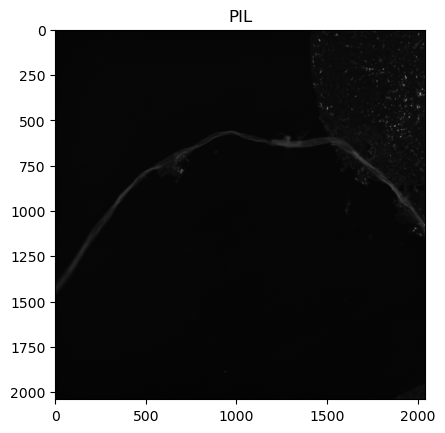

In [7]:
import matplotlib.pyplot as plt

# Assuming normalized_tensor_cv2 and normalized_tensor_pil are available
plt.imshow(cv2testt[0].numpy(), cmap='gray')
plt.title("cv2")
plt.show()

plt.imshow(normalized_tensor_pil[0].numpy(), cmap='gray')
plt.title("PIL")
plt.show()


In [8]:
with tifffile.TiffFile("train1/image/CTR_20200408_00R-Scene-020-ScanRegion19_S0M3_AF_FITC.tiff") as tif:
    print(tif.pages[0])

TiffPage 0 @8  2040x2040  uint16  minisblack adobe_deflate shaped


In [9]:
print(tensor_image)

tensor([[[ 704,  670,  664,  ..., 2263, 2894, 3601],
         [ 723,  796,  694,  ..., 2437, 3240, 3859],
         [ 636,  715,  714,  ..., 1911, 2259, 2612],
         ...,
         [ 811,  731,  729,  ..., 1057, 1147, 1106],
         [ 666,  760,  671,  ..., 1182, 1036, 1142],
         [ 762,  711,  765,  ..., 1117, 1105, 1113]]], dtype=torch.int16)


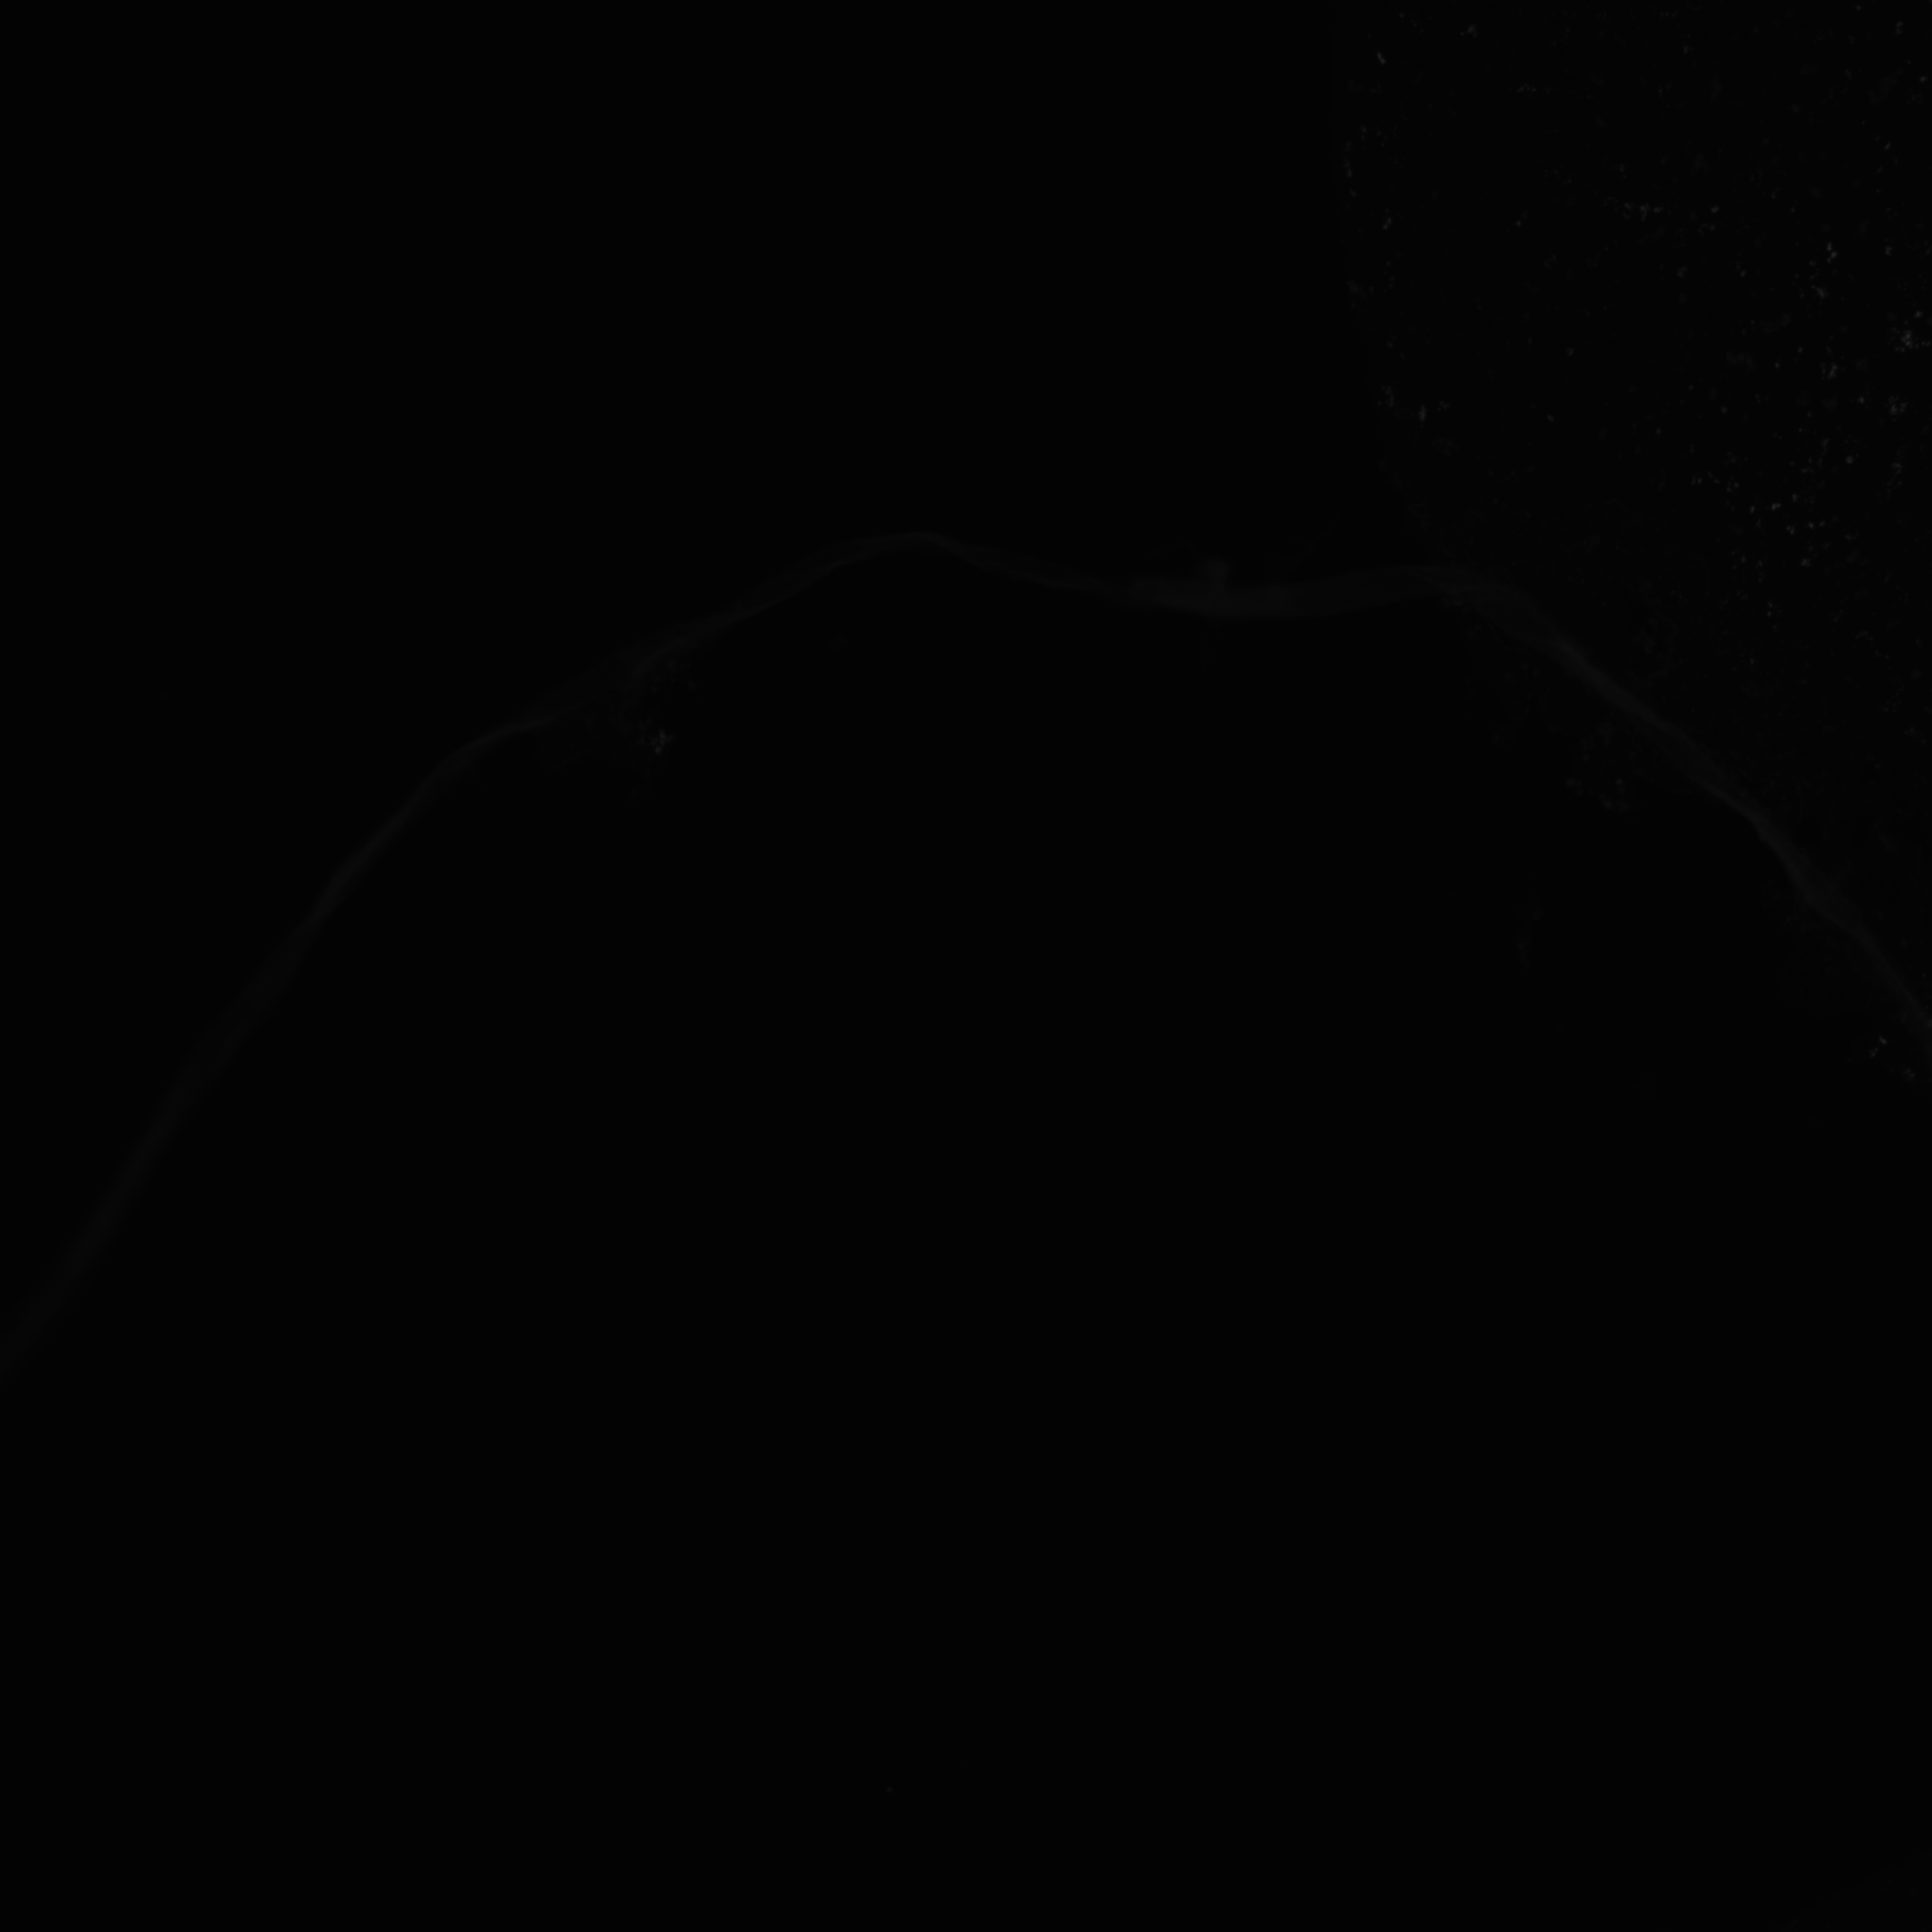

In [10]:
image

In [24]:
def read_images_from_folder(folder_path):
    artifacts1 = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.tif') or filename.endswith('.tiff'):
            # Read the TIFF image using tifffile
            image_path = os.path.join(folder_path, filename)
            tiff_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Convert the image to PyTorch tensor
            tensor_image = ToTensor()(tiff_image)
            
            # Append the tensor to the list of images
            artifacts1.append(tensor_image)
    return artifacts1

# Example usage
folder_path = 'train/image'
artifacts1 = read_images_from_folder(folder_path)

# Now 'images' is a list of PyTorch tensors, each representing one image from the folder


In [25]:
artifacts1[0]

tensor([[[0.0078, 0.0078, 0.0078,  ..., 0.0314, 0.0431, 0.0549],
         [0.0078, 0.0118, 0.0078,  ..., 0.0353, 0.0471, 0.0588],
         [0.0078, 0.0078, 0.0078,  ..., 0.0275, 0.0314, 0.0392],
         ...,
         [0.0118, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157]]])

In [26]:
artifacts1[0].shape

torch.Size([1, 2040, 2040])

In [30]:
print(artifacts1[0].dtype)

torch.float32


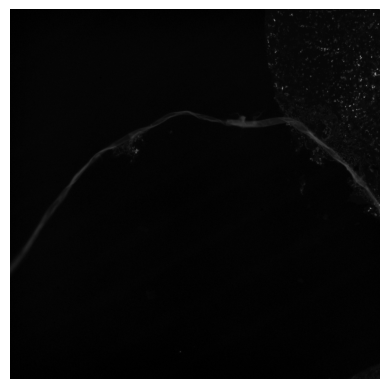

In [32]:
import matplotlib.pyplot as plt

# Assuming artifacts1[0] is your PyTorch tensor
image_data = artifacts1[0][0].numpy()  # Assuming it's a torch tensor, convert it to a NumPy array

plt.imshow(image_data, cmap='gray')
plt.axis('off')
plt.show()


In [14]:
non_zero_count = torch.count_nonzero(artifacts1[100]).item()
print("Number of non-zero elements:", non_zero_count)

Number of non-zero elements: 4161600


In [15]:
artifacts1[0].shape

torch.Size([1, 2040, 2040])

In [16]:
print(artifacts1[0])

tensor([[[ 704.,  670.,  664.,  ..., 2263., 2894., 3601.],
         [ 723.,  796.,  694.,  ..., 2437., 3240., 3859.],
         [ 636.,  715.,  714.,  ..., 1911., 2259., 2612.],
         ...,
         [ 811.,  731.,  729.,  ..., 1057., 1147., 1106.],
         [ 666.,  760.,  671.,  ..., 1182., 1036., 1142.],
         [ 762.,  711.,  765.,  ..., 1117., 1105., 1113.]]])


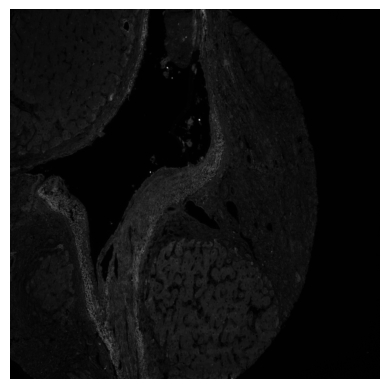

In [17]:
image=artifacts1[102]
plt.imshow(image[0], cmap='gray')  # cmap='gray' for grayscale images
plt.axis('off')  # Hide axes
plt.show()

In [18]:
folder_path2 = 'test/image'
artifacts2 = read_images_from_folder(folder_path2)

In [19]:
artifacts2[0].shape

torch.Size([1, 2040, 2040])

In [20]:
artifacts2[0]

tensor([[[ 723.,  790.,  767.,  ...,  791.,  855.,  852.],
         [ 747.,  675.,  709.,  ...,  801.,  781.,  784.],
         [ 717.,  685.,  719.,  ...,  784.,  809.,  705.],
         ...,
         [ 780.,  692.,  612.,  ..., 1276., 1275., 1259.],
         [ 703.,  705.,  726.,  ..., 1131., 1314., 1344.],
         [ 738.,  713.,  725.,  ..., 1144., 1142., 1233.]]])

In [21]:
folder_path3 = 'No_Artifacts'
noartifact = read_images_from_folder(folder_path3)

In [22]:
artifact = artifacts1.extend(artifacts2)

In [23]:
len(artifacts1)

443

In [24]:
len(artifacts2)

296

In [25]:
print(artifacts1)

[tensor([[[ 704.,  670.,  664.,  ..., 2263., 2894., 3601.],
         [ 723.,  796.,  694.,  ..., 2437., 3240., 3859.],
         [ 636.,  715.,  714.,  ..., 1911., 2259., 2612.],
         ...,
         [ 811.,  731.,  729.,  ..., 1057., 1147., 1106.],
         [ 666.,  760.,  671.,  ..., 1182., 1036., 1142.],
         [ 762.,  711.,  765.,  ..., 1117., 1105., 1113.]]]), tensor([[[ 496.,  339.,  419.,  ...,  707.,  952., 1235.],
         [ 441.,  462.,  402.,  ...,  962., 1241., 1239.],
         [ 409.,  465.,  490.,  ...,  773.,  884., 1054.],
         ...,
         [ 429.,  472.,  413.,  ...,  538.,  531.,  626.],
         [ 497.,  424.,  413.,  ...,  546.,  578.,  638.],
         [ 444.,  429.,  462.,  ...,  573.,  631.,  536.]]]), tensor([[[ 266.,  237.,  259.,  ..., 2137., 2089., 2157.],
         [ 280.,  288.,  259.,  ..., 2088., 2049., 2042.],
         [ 260.,  340.,  317.,  ..., 1858., 1933., 2114.],
         ...,
         [ 271.,  226.,  208.,  ..., 2479., 2588., 2614.],
       

In [26]:
artifacts1[0]

tensor([[[ 704.,  670.,  664.,  ..., 2263., 2894., 3601.],
         [ 723.,  796.,  694.,  ..., 2437., 3240., 3859.],
         [ 636.,  715.,  714.,  ..., 1911., 2259., 2612.],
         ...,
         [ 811.,  731.,  729.,  ..., 1057., 1147., 1106.],
         [ 666.,  760.,  671.,  ..., 1182., 1036., 1142.],
         [ 762.,  711.,  765.,  ..., 1117., 1105., 1113.]]])

In [27]:
artifacts1[147]

tensor([[[ 723.,  790.,  767.,  ...,  791.,  855.,  852.],
         [ 747.,  675.,  709.,  ...,  801.,  781.,  784.],
         [ 717.,  685.,  719.,  ...,  784.,  809.,  705.],
         ...,
         [ 780.,  692.,  612.,  ..., 1276., 1275., 1259.],
         [ 703.,  705.,  726.,  ..., 1131., 1314., 1344.],
         [ 738.,  713.,  725.,  ..., 1144., 1142., 1233.]]])

Create a tensor of ones the same length as artifacts1 (gonna be the target)

In [28]:
label1 = torch.ones(len(artifacts1))
label1
label1.shape

torch.Size([443])

same for noartifacts

In [29]:
label0 = torch.zeros(len(noartifact))
label0
label0.shape

torch.Size([252])

In [30]:
noartifact[0].shape

torch.Size([1, 2040, 2040])

In [31]:
noartifact[0]

tensor([[[ 208.,  227.,  181.,  ...,  215.,  195.,  161.],
         [ 172.,  190.,  190.,  ...,  218.,  256.,  209.],
         [ 196.,  212.,  183.,  ...,  167.,  202.,  165.],
         ...,
         [2216., 1011.,  802.,  ..., 2150., 2353., 2507.],
         [ 831.,  736.,  723.,  ..., 1269., 1719., 3817.],
         [ 633.,  640.,  611.,  ..., 1308., 1877., 4606.]]])

In [32]:
images = artifacts1 + noartifact

In [33]:
len(images)

695

In [34]:
labels = torch.cat((label1, label0), dim=0)

In [35]:
labels.shape

torch.Size([695])

In [36]:
labels

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

In [64]:
#Try cv2
import cv2
imgcv2 = cv2.imread('train1/image/CTR_20200408_00R-Scene-020-ScanRegion19_S0M3_AF_FITC.tiff')


In [65]:
imgcv2

array([[[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 8,  8,  8],
        [11, 11, 11],
        [14, 14, 14]],

       [[ 2,  2,  2],
        [ 3,  3,  3],
        [ 2,  2,  2],
        ...,
        [ 9,  9,  9],
        [12, 12, 12],
        [15, 15, 15]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 7,  7,  7],
        [ 8,  8,  8],
        [10, 10, 10]],

       ...,

       [[ 3,  3,  3],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)

In [66]:
img= ToTensor()(imgcv2)

In [67]:
print(img)

tensor([[[0.0078, 0.0078, 0.0078,  ..., 0.0314, 0.0431, 0.0549],
         [0.0078, 0.0118, 0.0078,  ..., 0.0353, 0.0471, 0.0588],
         [0.0078, 0.0078, 0.0078,  ..., 0.0275, 0.0314, 0.0392],
         ...,
         [0.0118, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0314, 0.0431, 0.0549],
         [0.0078, 0.0118, 0.0078,  ..., 0.0353, 0.0471, 0.0588],
         [0.0078, 0.0078, 0.0078,  ..., 0.0275, 0.0314, 0.0392],
         ...,
         [0.0118, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157],
         [0.0078, 0.0078, 0.0078,  ..., 0.0157, 0.0157, 0.0157]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0314, 0.0431, 0.0549],
         [0.0078, 0.0118, 0.0078,  ..., 0.0353, 0.0471, 0.0588],
         [0.0078, 0.0078, 0.0078,  ..., 0.0275, 0.0314, 0.

In [42]:
img.shape
#cv2 uses 3 channels, we only need 1. Pixel values are also normalized

torch.Size([3, 2040, 2040])

In [44]:
from torchvision.transforms.functional import rgb_to_grayscale
grayscale_img = rgb_to_grayscale(img)

In [45]:
grayscale_img.shape

torch.Size([1, 2040, 2040])

In [46]:
grayscale_img

tensor([[[0.0235, 0.0235, 0.0235,  ..., 0.0039, 0.0039, 0.0039],
         [0.0274, 0.0196, 0.0235,  ..., 0.0039, 0.0039, 0.0039],
         [0.0353, 0.0235, 0.0196,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0039],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0039]]])